In [1]:
import sys
sys.path.append('/Users/keyang/OneDrive/capstone/Deliverable/project/Stlearn')

import numpy as np
from Stlearn.Factory import *
from Stlearn.Portfolio import *
from Data.DataStructure import DateGenerator, Date
from tqdm import tqdm
import psutil
import tracemalloc


record = {}

model_names = ['CNN', 'LSTM', 'LSTMAutoRegressor', 'AE']
models = ['CNN', 'LSTM', 'LSTMAutoRegressor', 'StandardVariationAutoEncoder']

for i in range(4):
    
    model_name = model_names[i]
    model = models[i]
    
    train_start_date_s = '2009-12-01'
    val_start_date_s = '2019-12-01'
    test_start_date_s = '2020-01-01'
    test_end_date_s = '2020-02-01'

    freq = 'month'
    offset = 1
    limit = 12
    
    l_df = None

    train_start_date_generator = DateGenerator(Date.create_from_str(train_start_date_s), freq, offset, limit)
    val_start_date_generator = DateGenerator(Date.create_from_str(val_start_date_s), freq, offset, limit)
    test_start_date_generator = DateGenerator(Date.create_from_str(test_start_date_s), freq, offset, limit)
    test_end_date_generator = DateGenerator(Date.create_from_str(test_end_date_s), freq, offset, limit)

    for i in tqdm(range(limit)):

        train_start_date = train_start_date_generator.next()
        val_start_date = val_start_date_generator.next()
        test_start_date = test_start_date_generator.next()
        test_end_date = test_end_date_generator.next()

        lg = 'Train{} To {}_Validation{} To {}_Test{} To {}'.format(
            str(train_start_date), str(val_start_date), 
            str(val_start_date), str(test_start_date),
            str(test_start_date), str(test_end_date))

        save_path = '/Users/keyang/Desktop/model_cache/{}/{}'.format(lg, model_name)

        m, l = eval(model + 'Model').load(save_path)
        d = DiskDataTestProcessor(save_path + '/test_data.npz').load_data()

        portfolio = LongRandomTenPercentPortfolio(d, m)
        portfolio = LongBestTenPercentPortfolio(d, m)
        portfolio = LongMarketPortfolio(d, m)
        
        portfolio = LongShortBestTenPercentPortfolio(d, m)
        portfolio = LongShortRandomTenPercentPortfolio(d, m)
        
        if l_df is None:
            l_df = pd.DataFrame(l)[['loss', 'val_loss']]
        else:
            l_df += pd.DataFrame(l)[['loss', 'val_loss']]
        
    record[model] = {
        'LongRandomTenPercentPortfolio': copy.deepcopy(LongRandomTenPercentPortfolio.global_portfolio),
        'LongBestTenPercentPortfolio': copy.deepcopy(LongBestTenPercentPortfolio.global_portfolio),
        'LongMarketPortfolio': copy.deepcopy(LongMarketPortfolio.global_portfolio),
        
        'LongShortBestTenPercentPortfolio': copy.deepcopy(LongShortBestTenPercentPortfolio.global_portfolio),
        'LongShortRandomTenPercentPortfolio': copy.deepcopy(LongShortRandomTenPercentPortfolio.global_portfolio),
        
        'history': l_df / 12
    }

    LongRandomTenPercentPortfolio.global_portfolio = None
    LongBestTenPercentPortfolio.global_portfolio = None
    LongMarketPortfolio.global_portfolio = None
    
    LongShortBestTenPercentPortfolio.global_portfolio = None
    LongShortRandomTenPercentPortfolio.global_portfolio = None
    

  0%|                                                    | 0/12 [00:00<?, ?it/s]

X_test shape:(430, 30, 152)
ids_test shape: (9030, 5)
14/14 [==============================] - 0s 1ms/step


2022-12-19 16:29:27.223366: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
  8%|███▋                                        | 1/12 [00:00<00:06,  1.74it/s]

X_test shape:(430, 30, 152)
ids_test shape: (8170, 5)
14/14 [==============================] - 0s 784us/step


 17%|███████▎                                    | 2/12 [00:00<00:04,  2.13it/s]

X_test shape:(431, 30, 152)
ids_test shape: (9482, 5)
14/14 [==============================] - 0s 760us/step


 25%|███████████                                 | 3/12 [00:01<00:04,  2.19it/s]

X_test shape:(432, 30, 152)
ids_test shape: (9072, 5)
14/14 [==============================] - 0s 893us/step


 33%|██████████████▋                             | 4/12 [00:01<00:03,  2.22it/s]

X_test shape:(432, 30, 152)
ids_test shape: (8640, 5)
14/14 [==============================] - 0s 717us/step


 42%|██████████████████▎                         | 5/12 [00:02<00:03,  2.27it/s]

X_test shape:(433, 30, 152)
ids_test shape: (9526, 5)
14/14 [==============================] - 0s 718us/step


 50%|██████████████████████                      | 6/12 [00:02<00:02,  2.31it/s]

X_test shape:(433, 30, 152)
ids_test shape: (9526, 5)
14/14 [==============================] - 0s 764us/step


 58%|█████████████████████████▋                  | 7/12 [00:03<00:02,  2.30it/s]

X_test shape:(435, 30, 152)
ids_test shape: (9135, 5)
14/14 [==============================] - 0s 852us/step


 67%|█████████████████████████████▎              | 8/12 [00:03<00:01,  2.27it/s]

X_test shape:(435, 30, 152)
ids_test shape: (9135, 5)
14/14 [==============================] - 0s 998us/step


 75%|█████████████████████████████████           | 9/12 [00:04<00:01,  2.25it/s]

X_test shape:(436, 30, 152)
ids_test shape: (9592, 5)
14/14 [==============================] - 0s 508us/step


 83%|███████████████████████████████████▊       | 10/12 [00:04<00:00,  2.25it/s]

X_test shape:(436, 30, 152)
ids_test shape: (8720, 5)
14/14 [==============================] - 0s 707us/step


14/14 [==============================] - 0s 835us/step


 92%|███████████████████████████████████████▍   | 11/12 [00:04<00:00,  2.15it/s]

X_test shape:(436, 30, 152)
ids_test shape: (9592, 5)
14/14 [==============================] - 0s 704us/step


  0%|                                                    | 0/12 [00:00<?, ?it/s]

X_test shape:(430, 30, 152)
ids_test shape: (9030, 5)
14/14 [==============================] - 0s 1ms/step


  8%|███▋                                        | 1/12 [00:00<00:07,  1.57it/s]

X_test shape:(430, 30, 152)
ids_test shape: (8170, 5)
14/14 [==============================] - 0s 1ms/step


 17%|███████▎                                    | 2/12 [00:01<00:06,  1.62it/s]

X_test shape:(431, 30, 152)
ids_test shape: (9482, 5)
14/14 [==============================] - 0s 1ms/step


 25%|███████████                                 | 3/12 [00:01<00:05,  1.57it/s]

X_test shape:(432, 30, 152)
ids_test shape: (9072, 5)
14/14 [==============================] - 0s 1ms/step


 33%|██████████████▋                             | 4/12 [00:02<00:05,  1.46it/s]

X_test shape:(432, 30, 152)
ids_test shape: (8640, 5)
14/14 [==============================] - 0s 1ms/step


 42%|██████████████████▎                         | 5/12 [00:03<00:04,  1.52it/s]

X_test shape:(433, 30, 152)
ids_test shape: (9526, 5)
14/14 [==============================] - 0s 1ms/step


 50%|██████████████████████                      | 6/12 [00:03<00:03,  1.55it/s]

X_test shape:(433, 30, 152)
ids_test shape: (9526, 5)
14/14 [==============================] - 0s 1ms/step


 58%|█████████████████████████▋                  | 7/12 [00:04<00:03,  1.58it/s]

X_test shape:(435, 30, 152)
ids_test shape: (9135, 5)
14/14 [==============================] - 0s 1ms/step


 67%|█████████████████████████████▎              | 8/12 [00:05<00:02,  1.59it/s]

X_test shape:(435, 30, 152)
ids_test shape: (9135, 5)
14/14 [==============================] - 0s 1ms/step


 75%|█████████████████████████████████           | 9/12 [00:05<00:02,  1.49it/s]

X_test shape:(436, 30, 152)
ids_test shape: (9592, 5)
14/14 [==============================] - 0s 1ms/step


 83%|███████████████████████████████████▊       | 10/12 [00:06<00:01,  1.51it/s]

X_test shape:(436, 30, 152)
ids_test shape: (8720, 5)
14/14 [==============================] - 0s 1ms/step


 92%|███████████████████████████████████████▍   | 11/12 [00:07<00:00,  1.54it/s]

X_test shape:(436, 30, 152)
ids_test shape: (9592, 5)
14/14 [==============================] - 0s 1ms/step


  0%|                                                    | 0/12 [00:00<?, ?it/s]

X_test shape:(430, 30, 152)
ids_test shape: (9030, 5)
14/14 [==============================] - 0s 4ms/step


  8%|███▋                                        | 1/12 [00:01<00:11,  1.04s/it]

X_test shape:(430, 30, 152)
ids_test shape: (8170, 5)
14/14 [==============================] - 0s 4ms/step


 17%|███████▎                                    | 2/12 [00:01<00:09,  1.10it/s]

X_test shape:(431, 30, 152)
ids_test shape: (9482, 5)
14/14 [==============================] - 0s 4ms/step


 25%|███████████                                 | 3/12 [00:02<00:07,  1.18it/s]

X_test shape:(432, 30, 152)
ids_test shape: (9072, 5)
14/14 [==============================] - 0s 4ms/step


 33%|██████████████▋                             | 4/12 [00:03<00:06,  1.23it/s]

X_test shape:(432, 30, 152)
ids_test shape: (8640, 5)


14/14 [==============================] - 0s 4ms/step


 42%|██████████████████▎                         | 5/12 [00:04<00:06,  1.14it/s]

X_test shape:(433, 30, 152)
ids_test shape: (9526, 5)
14/14 [==============================] - 0s 4ms/step


 50%|██████████████████████                      | 6/12 [00:05<00:05,  1.19it/s]

X_test shape:(433, 30, 152)
ids_test shape: (9526, 5)
14/14 [==============================] - 0s 4ms/step


 58%|█████████████████████████▋                  | 7/12 [00:05<00:04,  1.22it/s]

X_test shape:(435, 30, 152)
ids_test shape: (9135, 5)


14/14 [==============================] - 0s 4ms/step


 67%|█████████████████████████████▎              | 8/12 [00:06<00:03,  1.16it/s]

X_test shape:(435, 30, 152)
ids_test shape: (9135, 5)
14/14 [==============================] - 0s 4ms/step


 75%|█████████████████████████████████           | 9/12 [00:07<00:02,  1.20it/s]

X_test shape:(436, 30, 152)
ids_test shape: (9592, 5)
14/14 [==============================] - 0s 4ms/step


 83%|███████████████████████████████████▊       | 10/12 [00:08<00:01,  1.23it/s]

X_test shape:(436, 30, 152)
ids_test shape: (8720, 5)
14/14 [==============================] - 0s 4ms/step


 92%|███████████████████████████████████████▍   | 11/12 [00:09<00:00,  1.26it/s]

X_test shape:(436, 30, 152)
ids_test shape: (9592, 5)


14/14 [==============================] - 0s 4ms/step


  0%|                                                    | 0/12 [00:00<?, ?it/s]

X_test shape:(1, 15, 430, 1)
ids_test shape: (9030, 5)


  8%|███▋                                        | 1/12 [00:00<00:05,  2.08it/s]

X_test shape:(1, 15, 430, 1)
ids_test shape: (8170, 5)


 17%|███████▎                                    | 2/12 [00:00<00:04,  2.17it/s]

X_test shape:(1, 15, 431, 1)
ids_test shape: (9482, 5)


 25%|███████████                                 | 3/12 [00:01<00:04,  2.17it/s]

X_test shape:(1, 15, 432, 1)
ids_test shape: (9072, 5)


 33%|██████████████▋                             | 4/12 [00:01<00:03,  2.16it/s]

X_test shape:(1, 15, 432, 1)
ids_test shape: (8640, 5)


 42%|██████████████████▎                         | 5/12 [00:02<00:03,  2.19it/s]

X_test shape:(1, 15, 433, 1)
ids_test shape: (9526, 5)


 50%|██████████████████████                      | 6/12 [00:02<00:02,  2.18it/s]

X_test shape:(1, 15, 433, 1)
ids_test shape: (9526, 5)


 58%|█████████████████████████▋                  | 7/12 [00:03<00:02,  2.15it/s]

X_test shape:(1, 15, 435, 1)
ids_test shape: (9135, 5)


 67%|█████████████████████████████▎              | 8/12 [00:03<00:01,  2.16it/s]

X_test shape:(1, 15, 435, 1)
ids_test shape: (9135, 5)


 75%|█████████████████████████████████           | 9/12 [00:04<00:01,  2.17it/s]

X_test shape:(1, 15, 436, 1)
ids_test shape: (9592, 5)


 83%|███████████████████████████████████▊       | 10/12 [00:04<00:00,  2.16it/s]

X_test shape:(1, 15, 436, 1)
ids_test shape: (8720, 5)


 92%|███████████████████████████████████████▍   | 11/12 [00:05<00:00,  1.88it/s]

X_test shape:(1, 15, 436, 1)
ids_test shape: (9592, 5)


100%|███████████████████████████████████████████| 12/12 [00:05<00:00,  2.08it/s]


In [2]:
df_portfolio_value = pd.DataFrame([])
for model in record.keys():
    for portfolio in record[model].keys():
        if portfolio == 'history': 
            continue
        df_portfolio_value[model + portfolio] = record[model][portfolio].performance.portfolio_value

<AxesSubplot: title={'center': 'LongPortfolio'}>

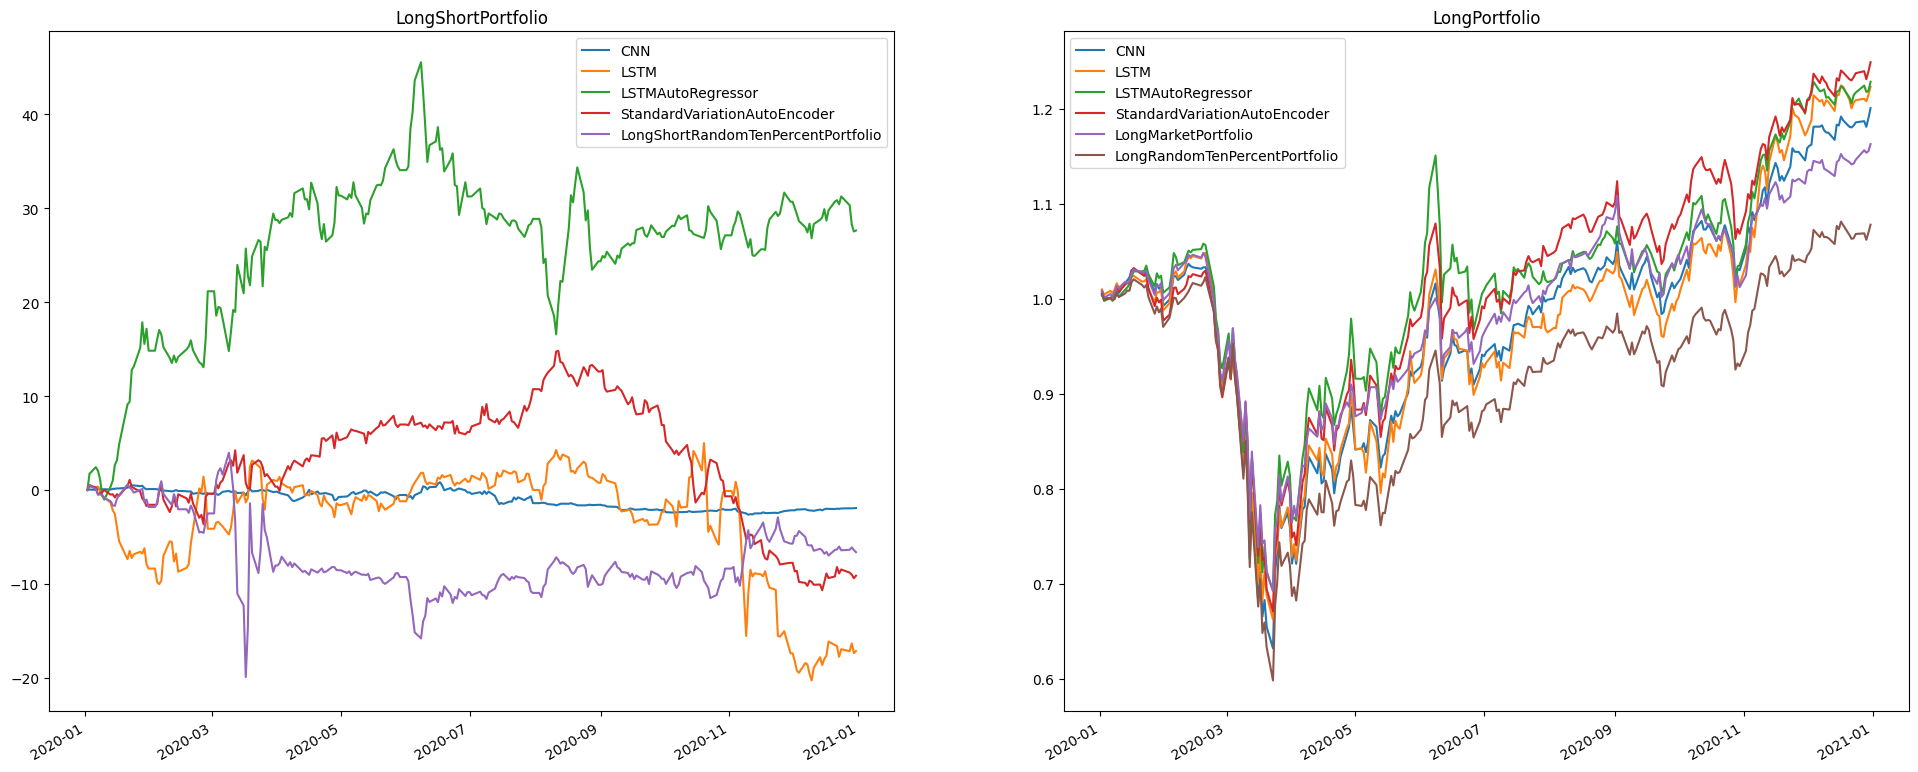

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(24, 10))

df_plot = df_portfolio_value[[i for i in df_portfolio_value.columns if 'LongShortBestTenPercentPortfolio' in i]+ ['CNNLongShortRandomTenPercentPortfolio']].rename(
    columns=lambda x: x.replace('LongShortBestTenPercentPortfolio', '')
    .replace('CNNLongShortRandomTenPercentPortfolio', 'LongShortRandomTenPercentPortfolio')
)

df_plot.plot(title='LongShortPortfolio', ax=axs[0])

df_plot = df_portfolio_value[[i for i in df_portfolio_value.columns if 'LongBestTenPercentPortfolio' in i] + ['CNNLongMarketPortfolio'] + ['CNNLongRandomTenPercentPortfolio']].rename(
    columns=lambda x: x.replace('LongBestTenPercentPortfolio', '')
    .replace('CNNLongMarketPortfolio', 'LongMarketPortfolio')
    .replace('CNNLongRandomTenPercentPortfolio', 'LongRandomTenPercentPortfolio')
)

df_plot.plot(title='LongPortfolio', ax=axs[1])

In [4]:
df_sharpe_ratio = pd.DataFrame([], index=['LongBestTenPercentPortfolio', 'LongShortBestTenPercentPortfolio', 'LongMarketPortfolio'],
                              columns=record.keys())
for model in df_sharpe_ratio.columns:
    for portfolio in df_sharpe_ratio.index:
        
        df_sharpe_ratio.loc[portfolio][model] = record[model][portfolio].performance.sharpe_ratio

In [5]:
df_sharpe_ratio

,CNN,LSTM,LSTMAutoRegressor,StandardVariationAutoEncoder
LongBestTenPercentPortfolio,0.684921,0.736226,0.746106,0.821496
LongShortBestTenPercentPortfolio,-2.534145,-0.595542,1.051773,-0.571112
LongMarketPortfolio,0.590189,0.590189,0.590189,0.590189
